In [1]:
import pandas as pd
import numpy as np

laws_and_policies = pd.read_excel('datasets/laws_and_policies_AGRI.xlsx')
laws_and_policies['all_law'] = 1

laws_and_policies['agricultur_law'] = np.where((laws_and_policies['sector_agriculture']==0) & (laws_and_policies['count_matches']==0), 0,1)
laws_and_policies['agricultur_law_yes'] = np.where((laws_and_policies['sector_agriculture']==0) & (laws_and_policies['count_matches']==0), "no", "yes")
laws_and_policies.columns = laws_and_policies.columns.str.replace(' ', '_')

laws_and_policies=laws_and_policies[laws_and_policies["EU_country"]>0]
laws_and_policies=laws_and_policies[laws_and_policies["After_2004"]>0]
del laws_and_policies['EU_country']
del laws_and_policies['After_2004']
del laws_and_policies['Unnamed:_0']
del laws_and_policies['sector_agriculture']
del laws_and_policies['sector_LULUCF']
del laws_and_policies['sector_agriculture_LULUCF']
del laws_and_policies['count_matches']

laws_and_policies_year = laws_and_policies.groupby(['First_year']).sum()
laws_and_policies_year.head(20)

,all_law,agricultur_law
First_year,,
2004,6,0
2005,13,0
2006,14,3
2007,21,1
2008,15,2
2009,34,6
2010,32,4
2011,30,6
2012,27,3


In [2]:
patents = pd.read_excel('datasets/patents_AGRI.xlsx')
patents['all_patent'] = 1

patents['agricultur_patent'] = np.where( (patents['count_matches']==0), 0,1)
patents['agricultur_patent_yes'] = np.where( (patents['count_matches']==0), "no", "yes")
patents.columns = patents.columns.str.replace(' ', '_')
patents=patents[patents["After_2004"]>0]
del patents['After_2004']
del patents['Unnamed:_0']
del patents['Unnamed:_0.1']
del patents['num_claims']
del patents['withdrawn']
del patents['count_matches']
del patents['count_unique_matches']
del patents['date_str']

patents_year = patents.groupby(['First_year']).sum()
patents_year.head(20)

,all_patent,agricultur_patent
First_year,,
2004,375,2
2005,286,0
2006,349,5
2007,294,2
2008,277,1
2009,317,1
2010,414,2
2011,479,2
2012,585,12


In [3]:
data_funding = pd.read_csv('datasets/cleantechtag_joint_results.csv') #only once is need
data_funding.columns = data_funding.columns.str.replace(' ', '_')
data_funding.startDate = pd.to_datetime(data_funding.startDate)
data_funding['First_year'] = pd.DatetimeIndex(data_funding['startDate']).year
data_funding['all_funded_projects'] = 1

# adding agriculture tagging
catalogue = pd.read_csv('datasets/cleantechtag_catalogue.csv')
sector_counts = pd.pivot_table(
    catalogue,
    index='id',
    columns='sector',
    aggfunc='count',
    fill_value=0)['category'].reset_index()
data_funding = pd\
    .merge(data_funding, sector_counts,
             how='left', on='id')\
    .sort_values(['startDate','ecMaxContribution'], ascending=False)\
    .reset_index()

data_funding['agricultur_funded_projects'] = np.where((data_funding['Agriculture']>0), 1,0)
del data_funding['Unnamed:_0']
del data_funding['rcn']
del data_funding['id']
del data_funding['totalCost']
del data_funding['subjects']
del data_funding['index']
del data_funding['Agriculture']
del data_funding['Buildings']
del data_funding['Energy']
del data_funding['Human settlements']
del data_funding['Industry']
del data_funding['Transport']



data_funding_year = data_funding.groupby(['First_year']).sum()
data_funding_year.head(20)

,ecMaxContribution,all_funded_projects,agricultur_funded_projects
First_year,,,
2014,5.070427e+06,24,0
2015,7.633768e+08,313,9
2016,1.037078e+09,329,13
2017,8.573949e+08,316,10
2018,8.198641e+08,321,15
2019,8.627032e+08,348,15
2020,2.793500e+08,81,5


In [4]:
dataset = pd.concat([laws_and_policies_year, patents_year,data_funding_year], axis = 1)
dataset.head(20)

,all_law,agricultur_law,all_patent,agricultur_patent,ecMaxContribution,all_funded_projects,agricultur_funded_projects
First_year,,,,,,,
2004,6,0,375.0,2.0,NaN,NaN,NaN
2005,13,0,286.0,0.0,NaN,NaN,NaN
2006,14,3,349.0,5.0,NaN,NaN,NaN
2007,21,1,294.0,2.0,NaN,NaN,NaN
2008,15,2,277.0,1.0,NaN,NaN,NaN
2009,34,6,317.0,1.0,NaN,NaN,NaN
2010,32,4,414.0,2.0,NaN,NaN,NaN
2011,30,6,479.0,2.0,NaN,NaN,NaN
2012,27,3,585.0,12.0,NaN,NaN,NaN


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams

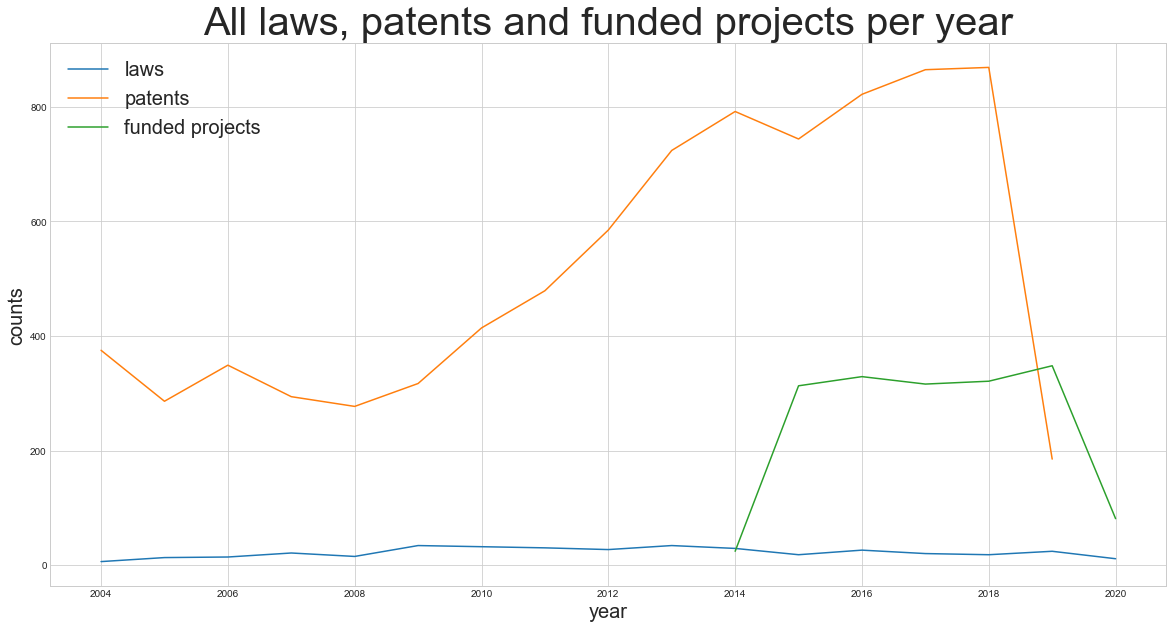

In [22]:
# all cases
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

plt.plot(dataset.all_law, label = "laws")
plt.plot(dataset.all_patent, label = "patents")
plt.plot(dataset.all_funded_projects, label = "funded projects")
plt.title("All laws, patents and funded projects per year", fontsize = 40)
plt.xlabel("year",fontsize = 20)
plt.ylabel("counts",fontsize = 20)
plt.legend(fontsize = 20)

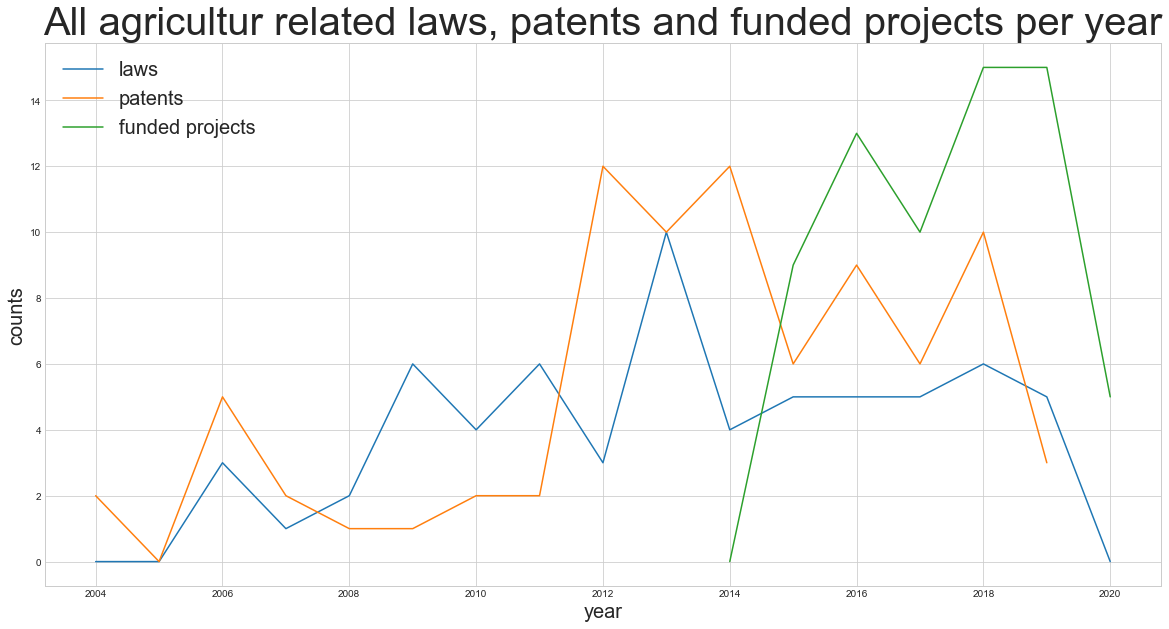

In [21]:
# all cases
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

plt.plot(dataset.agricultur_law, label = "laws")
plt.plot(dataset.agricultur_patent, label = "patents")
plt.plot(dataset.agricultur_funded_projects, label = "funded projects")
plt.title("All agricultur related laws, patents and funded projects per year", fontsize = 40)
plt.xlabel("year",fontsize = 20)
plt.ylabel("counts",fontsize = 20)
plt.legend(fontsize = 20)